## Introduction

The purpose of this notebook is to go through our cleaned and prepped ACT data, analyzing how the socioeconomic factors included in our data might help us to predict average ACT scores, and try to answer the question of there being any relation between ACT scores and socioeconomic factors. 

## Import libraries

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')

# Import additional libraries
import missingno as msno
from sklearn.linear_model import LinearRegression

from mpl_toolkits.mplot3d import Axes3D

import statsmodels.formula.api as smf
from mpl_toolkits import mplot3d
from matplotlib import cm

from sklearn import linear_model, tree
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

# Model preprocessing
from sklearn.preprocessing import StandardScaler

# Model metrics and analysis
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from statsmodels.stats.anova import anova_lm

## Load clean data

##### $\rightarrow$ Load the clean data set from Github. 

In [290]:
df_test = pd.read_csv("https://github.com/hopecrosier/Education/raw/main/Data/df_test.csv")

In [291]:
df_train = pd.read_csv("https://github.com/hopecrosier/Education/raw/main/Data/df_train.csv")

##### $\rightarrow$ Review the contents of the data set.

In [292]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1446 entries, 0 to 1445
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   median_income      1446 non-null   float64
 1   percent_college    1446 non-null   float64
 2   percent_lunch      1446 non-null   float64
 3   percent_married    1446 non-null   float64
 4   rate_unemployment  1446 non-null   float64
 5   school_level       1446 non-null   object 
 6   school_type        1446 non-null   object 
 7   state              1446 non-null   object 
 8   year               1446 non-null   object 
 9   zip_code           1446 non-null   int64  
 10  average_act        1446 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 124.4+ KB


In [293]:
df_train.isna().sum()

median_income        0
percent_college      0
percent_lunch        0
percent_married      0
rate_unemployment    0
state                0
average_act          0
dtype: int64

## State your questions

The overall problem is to determine whether and how average school ACT performance is related to socioeconomic factors. To answer this general problem, you will need to ask specific questions about the data.


##### $\rightarrow$ List your questions about the data that will help you solve the problem.

1. How does the percent of students on free lunch relate to act scores?
2. Is there any relationship between the rate of unnemployement and act scores?
3. Is there any relationship between the median income and act scores?
4. Is there any relationship between the rate of unnemployement and act scores?
5. Which linear regression model best represents our data?
6. Are there any other models we can fit to our data as a good representation?
7. Which predictors are most indicitive of ACT scores?
8. How well can we predict ACT scores using our predictors?

## Analysis

Perform analyses necessary to answer the questions. You will likely start by trying many things, some of which are useful and some of which are not. Don't be afraid to try different analyses at first. You will edit your notebook to a clean version that retains only the essential components at the end of the project.

This file should clearly produce the graphs, tables, models, etc that appear in the communication assignment.

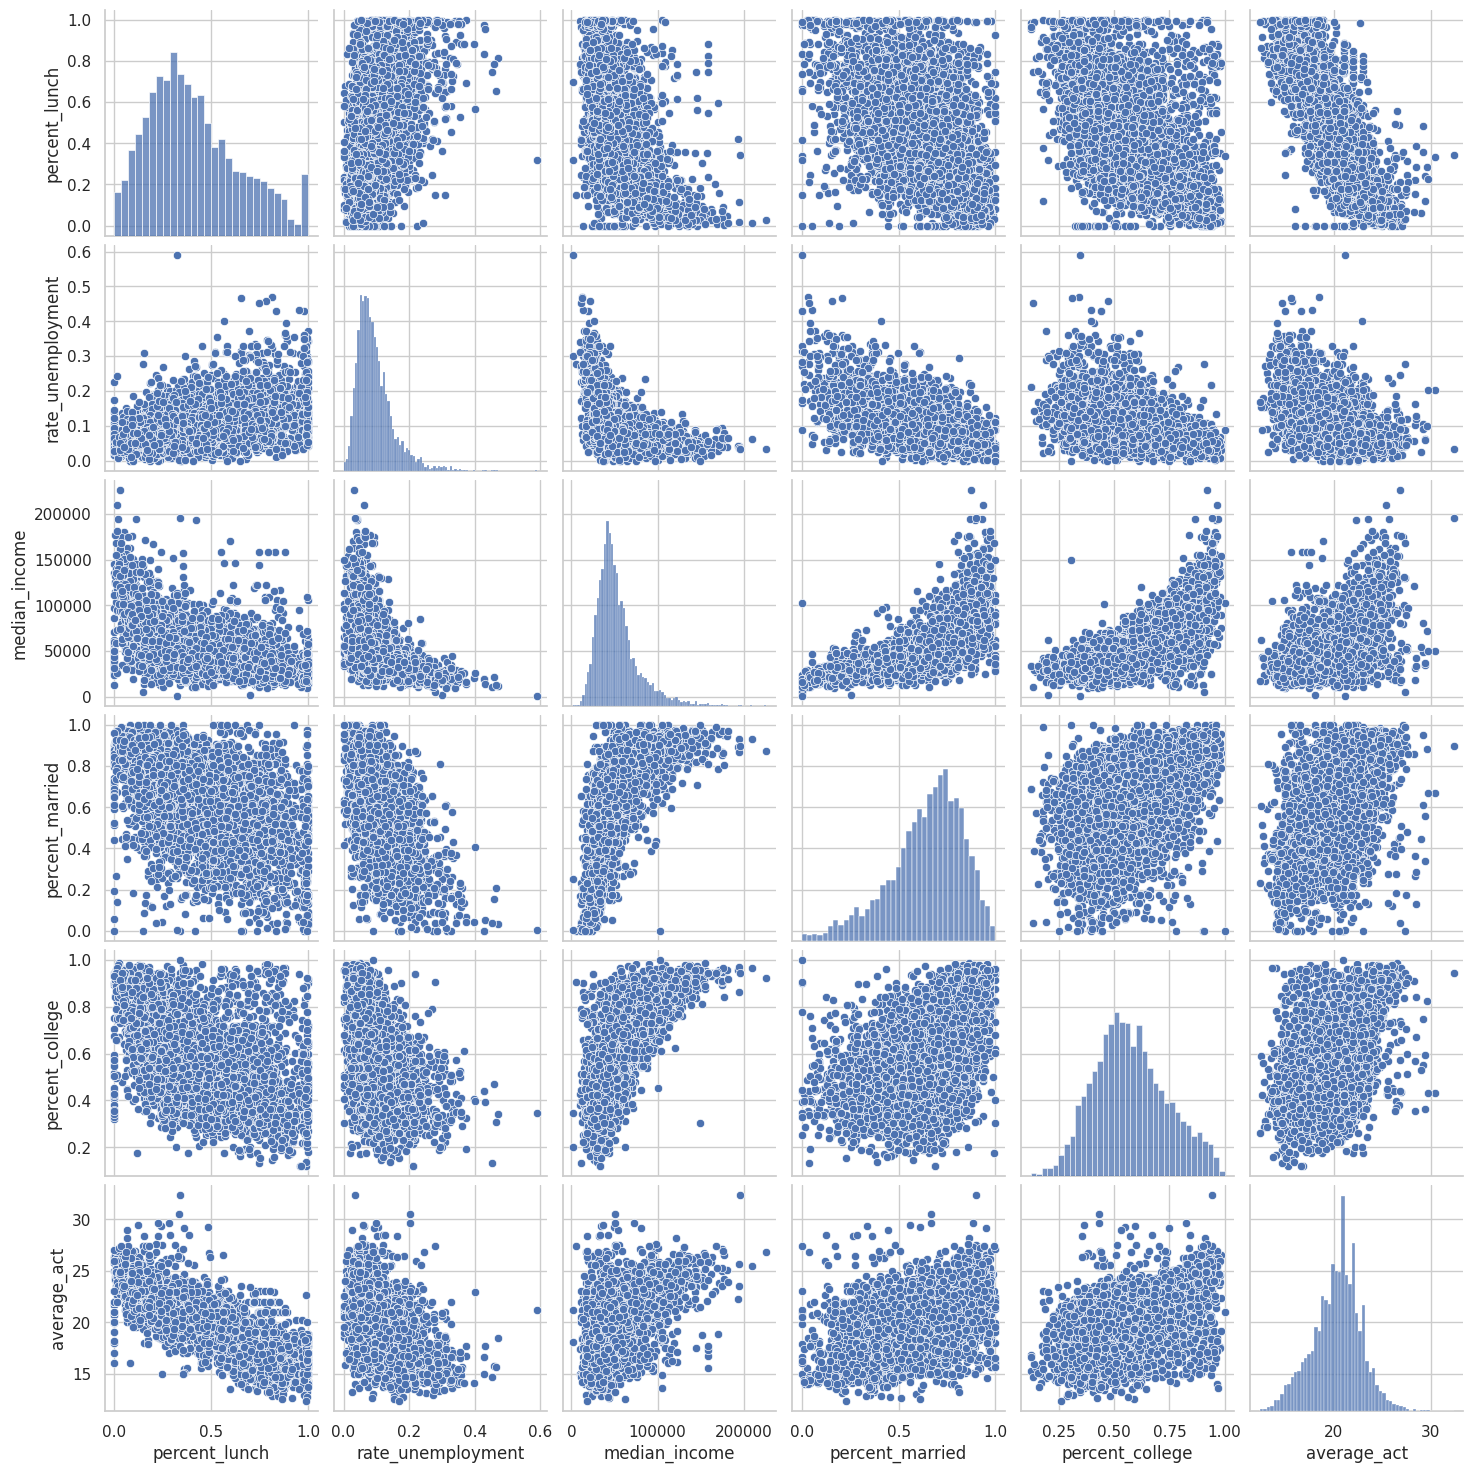

In [294]:
sns.pairplot(data = df_train.loc[:,['percent_lunch', 'rate_unemployment', 'median_income','percent_married', 'percent_college', 'average_act']])

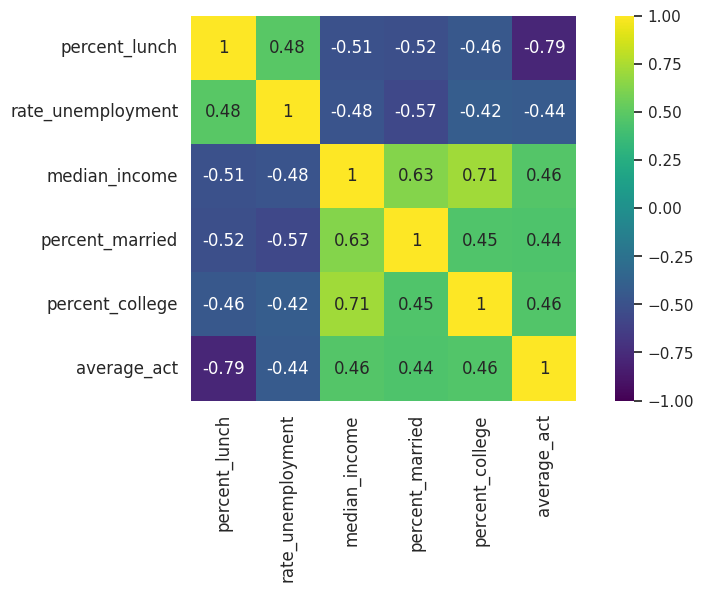

In [295]:
corr_matrix = df_train.loc[:,['percent_lunch', 'rate_unemployment', 'median_income','percent_married', 'percent_college', 'average_act']].corr()

plt.figure(figsize=(10,5))

sns.heatmap(corr_matrix, vmax=1, vmin=-1, square=True, annot=True, cmap='viridis')

plt.tick_params(labelsize=12);

The two graphs above show us the visual and numerical representation of relationships between the different factors in our data. We are most interested in how these different factors relate to `average_act`

---
Next we want to make a simple linear regression model using all 5 of our predictors and how they relate to `average_act`

In [296]:
model = smf.ols(formula='average_act ~ rate_unemployment + percent_college + percent_married + median_income + percent_lunch', data=df_train).fit()

In [297]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     1985.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        00:00:40   Log-Likelihood:                -10654.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5775   BIC:                         2.136e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7774      0.15

Looking at the summary of this model, we can see that the P value of `percent_married` and `median_income` are both very large. This tells us that these two predictors are not siginificant in our full model. <br> We can also see that our R^2 value is 0.632 which is relatively large, meaning this model does an alright job of fitting the data to the model. 

In [298]:
y_prediction = model.predict()

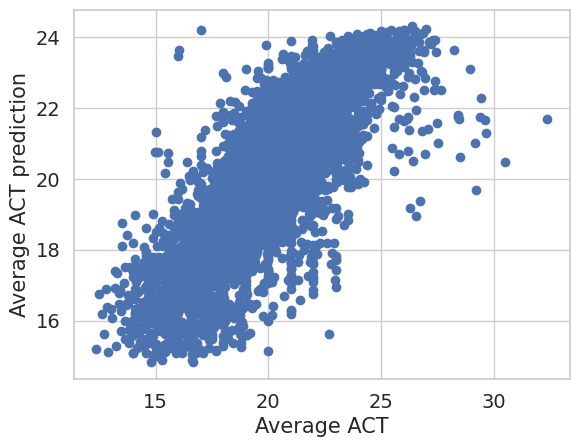

In [299]:
plt.plot(df_train['average_act'], y_prediction, 'o')

# Add axis labels
plt.xlabel('Average ACT', fontsize=15)
plt.ylabel('Average ACT prediction', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

This graph shows us our prediction of average ACT values using our 5 predictor model, visualizing that linear relationship

---
Now I wanted to look at the data we have and see if it looks like a model other than linear would be a good fit for our analysis

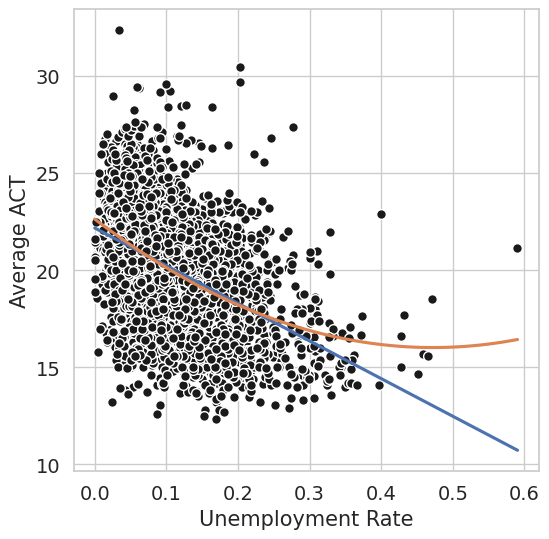

In [300]:
plt.figure(figsize=(6,6))

plt.plot(df_train['rate_unemployment'], df_train['average_act'], 'ko', mec ='w', ms=7)

sns.regplot(data=df_train, x = 'rate_unemployment', y = 'average_act', order=1, scatter=False, ci=None)
sns.regplot(data=df_train, x = 'rate_unemployment', y = 'average_act', order=2, scatter=False, ci=None)

plt.xlabel('Unemployment Rate', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

Here we can see that while the quadratic model isn't that far off from the linear, a linear model will still work best

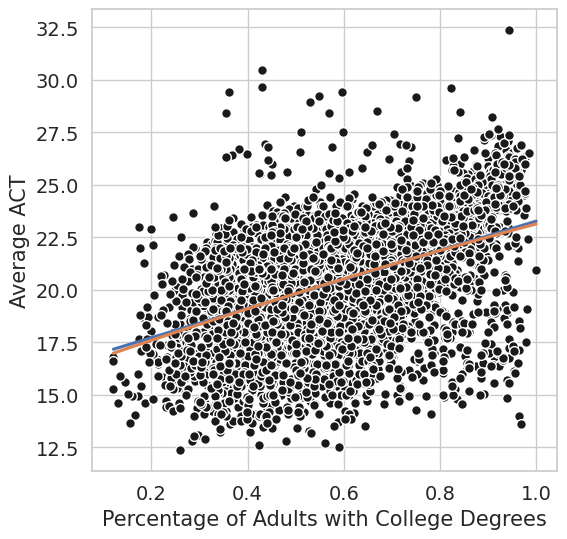

In [301]:
plt.figure(figsize=(6,6))

plt.plot(df_train['percent_college'], df_train['average_act'], 'ko', mec ='w', ms=7)

sns.regplot(data=df_train, x = 'percent_college', y = 'average_act', order=1, scatter=False, ci=None)
sns.regplot(data=df_train, x = 'percent_college', y = 'average_act', order=2, scatter=False, ci=None)

plt.xlabel('Percentage of Adults with College Degrees', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

In this case, the quadratic model fits almost exactly as a linear model, so again linear will work just fine

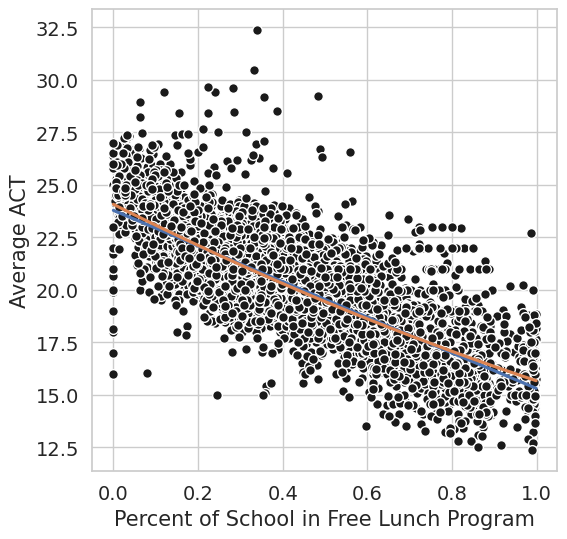

In [302]:
plt.figure(figsize=(6,6))

plt.plot(df_train['percent_lunch'], df_train['average_act'], 'ko', mec ='w', ms=7)

sns.regplot(data=df_train, x = 'percent_lunch', y = 'average_act', order=1, scatter=False, ci=None)
sns.regplot(data=df_train, x = 'percent_lunch', y = 'average_act', order=2, scatter=False, ci=None)

plt.xlabel('Percent of School in Free Lunch Program', fontsize=15)
plt.ylabel('Average ACT', fontsize=15)

plt.tick_params(labelsize=14);

This is the same case as the percent_college graph, where the quadratic and linear fits look almost identical, telling us that a linear model will work and we don't need to bother with a quadratic one

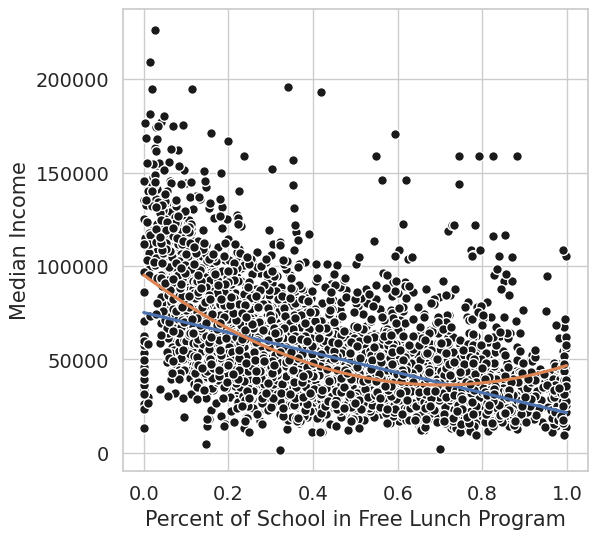

In [303]:
plt.figure(figsize=(6,6))

plt.plot(df_train['percent_lunch'], df_train['median_income'], 'ko', mec ='w', ms=7)

sns.regplot(data=df_train, x = 'percent_lunch', y = 'median_income', order=1, scatter=False, ci=None)
sns.regplot(data=df_train, x = 'percent_lunch', y = 'median_income', order=2, scatter=False, ci=None)

plt.xlabel('Percent of School in Free Lunch Program', fontsize=15)
plt.ylabel('Median Income', fontsize=15)

plt.tick_params(labelsize=14);

This graph helps explain why in the full model we don't need both of these variables, only one is significant in combination with the other variables

---

#Best Subset Selection

Now we want to find what subset of predictors in our data will be the best selection to create a linear regression model of

In [304]:
from itertools import combinations
from math import comb

In [305]:
X = df_train[['percent_lunch', 'percent_college', 'rate_unemployment', 'percent_married', 'median_income']]
y = df_train['average_act']

In [306]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5781 entries, 0 to 5780
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   percent_lunch      5781 non-null   float64
 1   percent_college    5781 non-null   float64
 2   rate_unemployment  5781 non-null   float64
 3   percent_married    5781 non-null   float64
 4   median_income      5781 non-null   float64
dtypes: float64(5)
memory usage: 225.9 KB


In [307]:
variable_names = X.columns.values
print(variable_names)

['percent_lunch' 'percent_college' 'rate_unemployment' 'percent_married'
 'median_income']


In [308]:
subset = combinations(variable_names, 2)

for n, names in enumerate(subset):
    print(names)

('percent_lunch', 'percent_college')
('percent_lunch', 'rate_unemployment')
('percent_lunch', 'percent_married')
('percent_lunch', 'median_income')
('percent_college', 'rate_unemployment')
('percent_college', 'percent_married')
('percent_college', 'median_income')
('rate_unemployment', 'percent_married')
('rate_unemployment', 'median_income')
('percent_married', 'median_income')


In [309]:
predictors = X.loc[:,names]

predictors.head()

,percent_married,median_income
0,0.574034,41793.0
1,0.711429,38173.0
2,0.694514,39635.0
3,0.766901,40978.0
4,0.803435,36875.0


In [310]:
model3 = sm.OLS(y, sm.add_constant(predictors)).fit() 

In [311]:
model3.aic

25412.184910378317

In [312]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     977.1
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        00:00:43   Log-Likelihood:                -12703.
No. Observations:                5781   AIC:                         2.541e+04
Df Residuals:                    5778   BIC:                         2.543e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              16.5436      0.100    1

In [313]:
y_prediction_predictors = model3.predict()

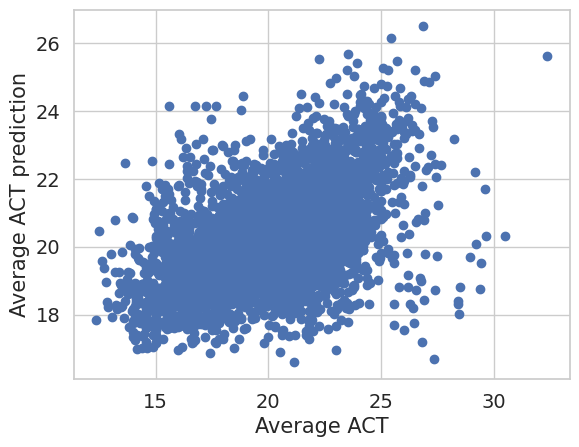

In [314]:
plt.plot(df_train['average_act'], y_prediction_predictors, 'o')

# Add axis labels
plt.xlabel('Average ACT', fontsize=15)
plt.ylabel('Average ACT prediction', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

This graphs shows a somewhat linear prediction but I think it could still be improved

The following code is going to go through all our predictors and find which combination of them gives us the best r^2, BIC and AIC values.

In [315]:
best_subs = (('',), 0.0, 123456.0)
r2_list = []
name_list = []
bic_list = []
aic_list = []

for val in range(1,6):
  subset = combinations(variable_names, val)
  best_this = ((''), 0.0, 0.0)
  bestName = ''
  bestR2 = 0
  bestAIC = 999999
  bestBIC = 999999
  for n, names, in enumerate(subset):
    selec = df_train.loc[:,names]
    model = sm.OLS(df_train['average_act'], sm.add_constant(selec)).fit()
    if (model.rsquared > best_this[1]):
      best_this = (names, model.rsquared, model.bic)
      best_name = names
      best_r2 = model.rsquared
      best_aic = model.aic
      best_bic = model.bic
    if (best_this[2] < best_subs[2]):
      best_subs = best_this
  r2_list.append(best_r2)
  name_list.append(best_name)
  bic_list.append(best_bic)
  aic_list.append(best_aic)

In [316]:
name_list

[('percent_lunch',),
 ('percent_lunch', 'percent_college'),
 ('percent_lunch', 'percent_college', 'rate_unemployment'),
 ('percent_lunch', 'percent_college', 'rate_unemployment', 'median_income'),
 ('percent_lunch',
  'percent_college',
  'rate_unemployment',
  'percent_married',
  'median_income')]

In [317]:
num_predictors = [1, 2, 3, 4, 5]

We want to be able to see how the r^2, BIC and AIC changed as we upped the number of predictors in our subset, which can be seen in the three graphs below.

Text(0, 0.5, 'AIC Value')

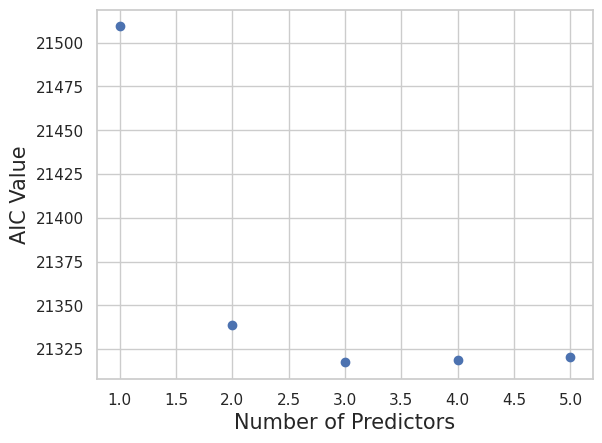

In [318]:
plt.plot(num_predictors, aic_list, 'o')
plt.xlabel('Number of Predictors', fontsize=15)
plt.ylabel('AIC Value', fontsize=15)

Text(0, 0.5, 'BIC Value')

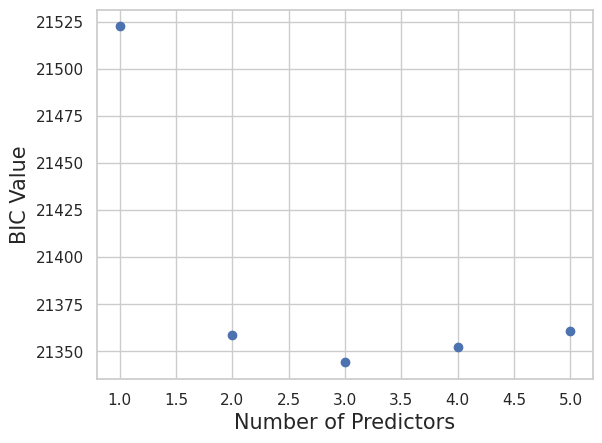

In [319]:
plt.plot(num_predictors, bic_list, 'o')
plt.xlabel('Number of Predictors', fontsize=15)
plt.ylabel('BIC Value', fontsize=15)

Text(0, 0.5, 'r^2 Value')

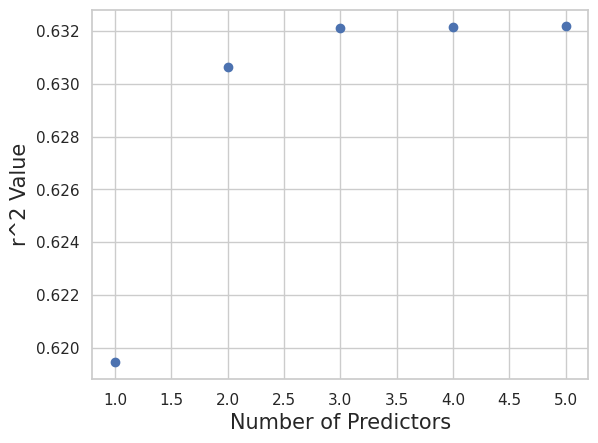

In [320]:
plt.plot(num_predictors, r2_list, 'o')
plt.xlabel('Number of Predictors', fontsize=15)
plt.ylabel('r^2 Value', fontsize=15)

From the graphs we can see that when there are 3 predictors, the R^2 is the highest and the AIC and BIC are the lowest, which is what we are looking for in a good subset selection

In [321]:
best_subs

(('percent_lunch', 'percent_college', 'rate_unemployment'),
 0.6321195252567744,
 21344.025508862585)

- compare actual performance across all numbers of predictors
- examine results for the "best" model
- create z scores for inputs and compare coefficients

In [322]:
model_best = smf.ols(formula='average_act ~ percent_lunch + percent_college + rate_unemployment', data=df_train).fit()

In [323]:
print(model_best.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        00:00:45   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            22.7261      0.11

Above we can see the model summary for the model using the subset from our subset selection. Our data looks solid, with no values anywhere jumping out to cause concern. 

---
I want to look more into each individual predictor, and see how much they impact the model

In [324]:
coef = [7.7119, 1.6361, 2.0269]

In [325]:
predictor_name = ['percent_lunch', 'percent_college', 'rate_unemployment']

Text(0.5, 1.0, 'Coefficients of Different Predictors')

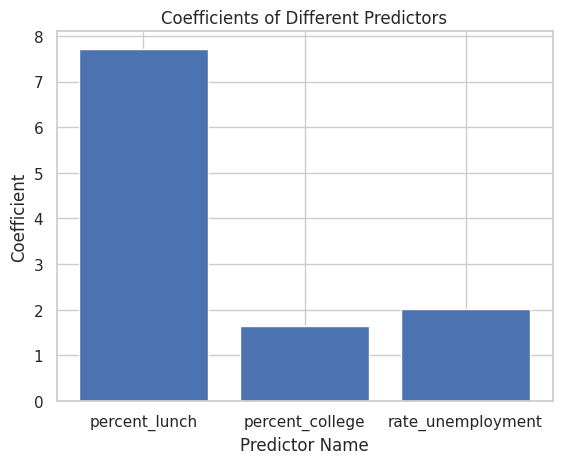

In [326]:
plt.bar(predictor_name, coef)
plt.xlabel('Predictor Name')
plt.ylabel('Coefficient')
plt.title('Coefficients of Different Predictors')

This bar graph tells us that while all three predictors are involved in predicting ACT scores, percent_lunch has the most influence with a coefficient three times larger than the remaining two predictors. 

In [327]:
y_prediction_subset = model_best.predict()

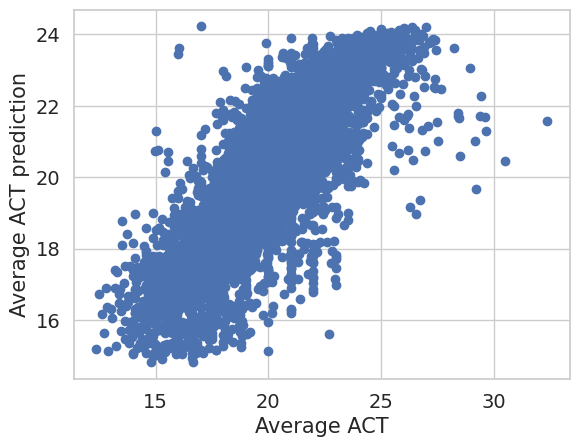

In [328]:
plt.plot(df_train['average_act'], y_prediction_subset, 'o')

# Add axis labels
plt.xlabel('Average ACT', fontsize=15)
plt.ylabel('Average ACT prediction', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

Compared to our predicition from the full 5 predictor model, this graph has a much more concise and linear relationship telling us that this model better fits our data and will enable us to predict average ACT scores better

---
Now I am going to create z scores for our inputs and again look at the coefficients it results in for each predictor

In [329]:
df_train['percent_lunch_z'] = (df_train['percent_lunch'] - np.mean(df_train['percent_lunch']))/np.std(df_train['percent_lunch'],ddof=1)

In [330]:
df_train['percent_college_z'] = (df_train['percent_college'] - np.mean(df_train['percent_college']))/np.std(df_train['percent_college'],ddof=1)

In [331]:
df_train['rate_unemployment_z'] = (df_train['rate_unemployment'] - np.mean(df_train['rate_unemployment']))/np.std(df_train['rate_unemployment'],ddof=1)

In [332]:
model_z = smf.ols(formula='average_act ~ percent_lunch_z + percent_college_z + rate_unemployment_z', data=df_train).fit()

In [333]:
print(model_z.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        00:00:46   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              20.3148    

Getting the z scores of our data allows us to compare our results on a distribution and see where each one falls in relation to the mean and standard deviation of our data

#Sklearn

Now we want to find the best linear representation of our model

In [334]:
X = X[['percent_lunch', 'percent_college', 'rate_unemployment']]

In [335]:
X.head()

,percent_lunch,percent_college,rate_unemployment
0,0.542056,0.602419,0.111111
1,0.339655,0.469225,0.135246
2,0.270175,0.567361,0.083419
3,0.315556,0.467614,0.062531
4,0.548410,0.604470,0.071429


In [336]:
scaler = StandardScaler().fit(X)

In [337]:
print(scaler.mean_, scaler.scale_)

[0.40914919 0.57369872 0.09602587] [0.23373368 0.16576247 0.05677318]


In [338]:
Z = scaler.transform(X)

In [339]:
print(np.mean(Z, axis = 0).round(3))
print(np.std(Z, axis = 0))

[-0. -0.  0.]
[1. 1. 1.]


We want to make sure our mean is 0 and our standard deviation is 1 for all of our predictors, which we can see is the case here

Now to fit this data into a linear regression model

In [340]:
model_z2 = sm.OLS(y, sm.add_constant(Z)).fit() 

In [341]:
print(model_z2.summary())

                            OLS Regression Results                            
Dep. Variable:            average_act   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     3309.
Date:                Sat, 06 May 2023   Prob (F-statistic):               0.00
Time:                        00:00:46   Log-Likelihood:                -10655.
No. Observations:                5781   AIC:                         2.132e+04
Df Residuals:                    5777   BIC:                         2.134e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3148      0.020   1010.352      0.0

---
Now we want to use this model to predict ACT scores

In [342]:
y_prediction_z = model_z2.predict()

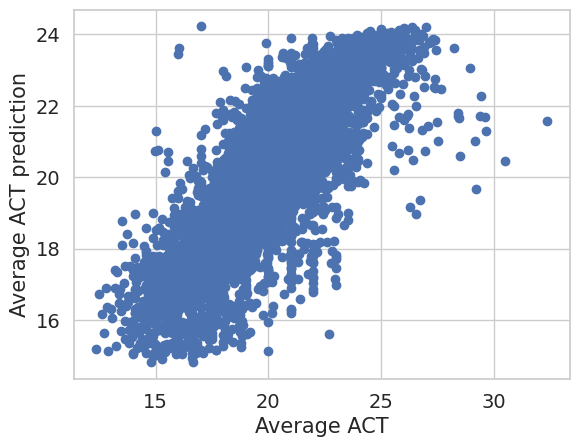

In [343]:
plt.plot(df_train['average_act'], y_prediction_z, 'o')

# Add axis labels
plt.xlabel('Average ACT', fontsize=15)
plt.ylabel('Average ACT prediction', fontsize=15)

# Increase the fontsize of the tick labels
plt.tick_params(labelsize=14);

This graph here shows the strong linear relationship between the prediction from the model we made and the actual ACT data we have, telling us the model we have does a good job of predicting ACT scores

In [344]:
m2_conf = mean_squared_error(df_train['average_act'], y_prediction_z)

In [345]:
m2_conf

2.335505796770681

This shows us that we can predict ACT scores within a range of 2.33 accuracy, in units of ACT score

In [346]:
r2_conf = r2_score(df_train['average_act'], y_prediction_z)

In [347]:
r2_conf

0.6321195252567744

In [348]:
abs_conf = mean_absolute_error(df_train['average_act'], y_prediction_z)

In [349]:
abs_conf

1.1397458977410464

These confidence variables are also on the smaller side, meaning our predictions aren't very far off from the actual values.

---
#Additional Step

We will be looking at how major political party of a state might have a correlation on ACT scores

In [350]:
import plotly.offline as po
import plotly.graph_objs as pg

The following code will show us what states we actually have data for in our dataframe 

In [351]:
layout = dict(geo = {'scope':'usa'})

data = dict(type = 'choropleth',
            locations = df_train['state'].unique(),
            locationmode = 'USA-states',
            z = np.ones(len(df_train['state'].unique())),
            text = df_train['state'].unique()
            )

x = pg.Figure(data = [data], layout = layout)
po.iplot(x)

As we can see, we only have data for 20 of the 50 states
<br>
The following data comes from an excel sheet we made using data gathered from [this](https://www.nytimes.com/elections/2016/results/president) NY Times article 

In [352]:
state_data = pd.read_excel('https://github.com/hopecrosier/Education/blob/main/Data/StateData.xlsx?raw=true')

In [353]:
state_data.head()

,state,party
0,WA,D
1,WY,R
2,TX,R
3,LA,R
4,FL,R


D stands for Democrat, and R stand for Republican to represent which political party the majority of the state voted for in the 2016 election

In [354]:
df_state_train = df_train.merge(state_data, how = 'right', on = 'state')

Now I have a data frame that contains all our training data, along with the corresponding state the data came from and the major political party of that state from the election

In [355]:
df_state_train.head()

,median_income,percent_college,percent_lunch,percent_married,rate_unemployment,state,average_act,percent_lunch_z,percent_college_z,rate_unemployment_z,party
0,68371.0,0.832136,0.255148,0.525547,0.091684,WA,23.498168,-0.658819,1.558950,-0.076463,D
1,61250.0,0.621197,0.242017,0.661754,0.159808,WA,21.568987,-0.714993,0.286517,1.123357,D
2,38182.0,0.620830,0.363921,0.615611,0.134357,WA,22.594628,-0.193487,0.284309,0.675104,D
3,41062.0,0.359717,0.986425,0.731992,0.061127,WA,18.003663,2.469589,-1.290782,-0.614647,D
4,45781.0,0.497257,0.676550,0.560061,0.096353,WA,18.516484,1.143941,-0.461112,0.005761,D


Now we want to analyze this data in regards to our average ACT and act predictor values

Text(0.5, 0, 'State')

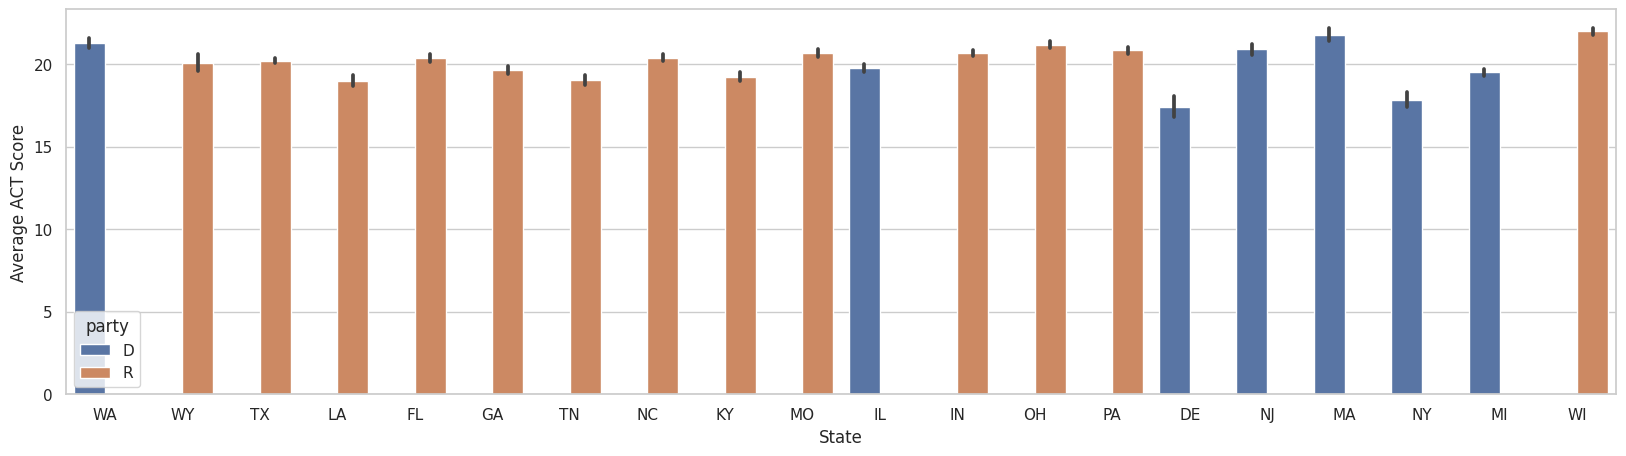

In [356]:
plt.figure(figsize=(20,5))
sns.barplot(data = df_state_train, x = 'state', y = 'average_act', hue = 'party')
plt.ylabel('Average ACT Score')
plt.xlabel('State')

This barplot just shows us the overall average ACT for each state, and what major political party that state was in 2016

Text(0.5, 36.26562500000003, 'Percentage of Adults with College Degrees')

<Figure size 1500x500 with 0 Axes>

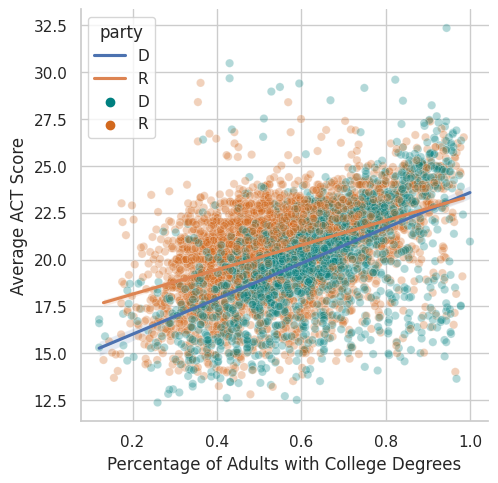

In [357]:
plt.figure(figsize=(15,5))
sns.lmplot(data = df_state_train, x = 'percent_college', y = 'average_act', hue = 'party', scatter = False, legend = False)
sns.scatterplot(data = df_state_train, x = 'percent_college', y = 'average_act', hue = 'party', palette=['teal', 'chocolate'], alpha = 0.3)
plt.ylabel('Average ACT Score')
plt.xlabel('Percentage of Adults with College Degrees')

Text(0.5, 36.26562500000003, 'Percent of Free/Reduced Lunch')

<Figure size 1500x500 with 0 Axes>

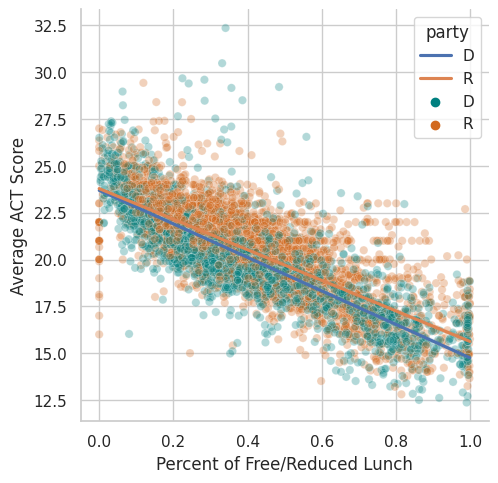

In [358]:
plt.figure(figsize=(15,5))
sns.lmplot(data = df_state_train, x = 'percent_lunch', y = 'average_act', hue = 'party', scatter = False, legend = False)
sns.scatterplot(data = df_state_train, x = 'percent_lunch', y = 'average_act', hue = 'party', palette=['teal', 'chocolate'], alpha = 0.3)
plt.ylabel('Average ACT Score')
plt.xlabel('Percent of Free/Reduced Lunch')

The two graphs above attempt to show if there is any relationship between the two different parties and how those states perform both ACT wise and in regards to percent free lunch and percent of college degrees in adults
<br>
Seeing as the lines of best fit really aren't that different from each other, this leads me to conclude that major political party has no correlation to ACT score or related socioeconomic factors

Text(0, 0.5, 'Average ACT Score')

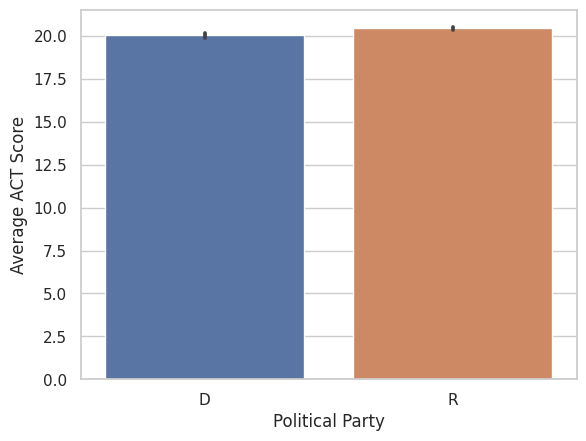

In [359]:
sns.barplot(data = df_state_train, x = 'party', y = 'average_act')
plt.xlabel('Political Party')
plt.ylabel('Average ACT Score')

After analyzing the data from the perspective of this extra step, there aren't enough defining differences between the Republican and Democratic states for me to conclude a noticable impact of political party on socioeconomic factors and relating ACT scores

## Conclusion

Provide a brief description of your conclusions.

---
After analyzing the data in this notebook, I have come to the conclusion that the percent of students on free/reduced lunch programs is a key indicator of ACT scores. We saw that in the original data, a higher percent of students in those lunch programs corresponded with a lower average act score. This predictor became the most significant in our final model. Other predictors such as the rate of unemployed families and the percent of adults that had college degrees were also significant in being able to find a model to predict ACT scores. Overall, I conclude that socioeconomic factors can be predicted by socioeconomic factors. This is due to the large R^2 values, small P values, small confidence intervals and graphicial representations of predictions versus actual values. I think we can predict ACT scores within 2.33 points